In [93]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [94]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [95]:
np.random.seed(42)

#x = dataset.data[:, :] # Feature 0 und 1
x = dataset.data[:, 5:6]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [96]:
regr = LinearRegression()
regr.fit(x_train, y_train)
r2_score = regr.score(x_test, y_test)

print(f"Coef: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2Score: {r2_score}") 

Coef: [9.1181022]
Intercept: -34.662307438406785
R2Score: 0.4584649934303068


### Non-linear Transformation

In [97]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
pf = PolynomialFeatures(degree=degree)
pf.fit(x_train)

x_train_transformed = pf.transform(x_train)
x_test_transformed = pf.transform(x_test)



In [98]:
print(x_train.shape, x_train_transformed.shape)
print(x_test.shape, x_test_transformed.shape)

(354, 1) (354, 3)
(152, 1) (152, 3)


In [99]:
print(f"Old num features: {pf.n_input_features_}")
print(f"New num features: {pf.n_output_features_}")
print("Old feature names: [x0, x1]")
print(f"New feature names: {pf.get_feature_names()}")

Old num features: 1
New num features: 3
Old feature names: [x0, x1]
New feature names: ['1', 'x0', 'x0^2']


### Polynomial Regression:


In [100]:
poly_regr = LinearRegression()
poly_regr.fit(x_train_transformed, y_train)
r2_score = poly_regr.score(x_test_transformed, y_test)

print(f"Coef: {regr.coef_}")
print(f"Intercept: {poly_regr.intercept_}")
print(f"R2Score: {r2_score}") 

Coef: [9.1181022]
Intercept: 55.61231071352627
R2Score: 0.5685094410898879


In [101]:
def plot_residuals(regr, x_train, y_train, x_test, y_test):
    #differenzen von der prediction zum wahren wert
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)

    min_val = min(np.min(y_pred_train), np.min(y_pred_test))
    max_val = min(np.max(y_pred_train), np.max(y_pred_test))

    plt.scatter(y_pred_train, y_pred_train - y_train, color="blue")
    plt.scatter(y_pred_test, y_pred_test - y_test, color="red")
    plt.hlines(y=0, xmin=min_val, xmax=max_val)
    plt.legend(["Train", "Test"])
    plt.show()

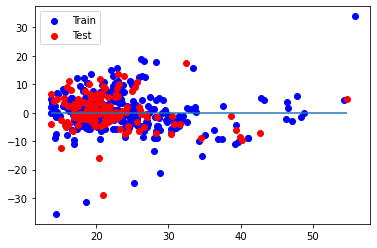

In [102]:
plot_residuals(poly_regr, x_train_transformed,y_train, x_test_transformed, y_test)

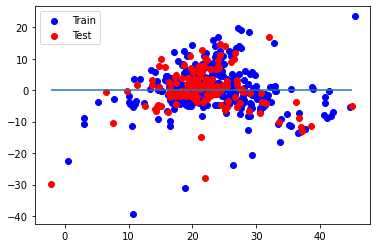

In [103]:
plot_residuals(regr, x_train,y_train, x_test, y_test)